# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [ ]:
import kagglehub
import os
import pandas as pd

In [ ]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

100%|██████████| 14.9k/14.9k [00:00<00:00, 17.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abcsds/pokemon/versions/2


In [ ]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [ ]:
len(df)

800


List all columns available (3 pts)

In [ ]:
df.columns.tolist()

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [ ]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
features_df = df[features]

Are there any missing values? (2 pts)

In [ ]:
features_df.isnull().sum()
features_df.drop_duplicates()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


If missing values exist, describe how you handled them (3 pts)

with the new selected features I used .isnull().sum to check for missing values and found out there is none, with the selected features

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns)
display(scaled_features_df.head())

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

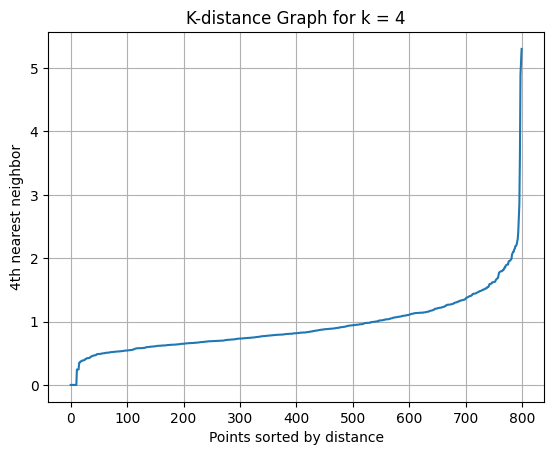

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_features_df)
distances, indices = neighbors_fit.kneighbors(scaled_features_df)

k_distances = np.sort(distances[:, k-1], axis=0)

plt.plot(k_distances)
plt.ylabel("4th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"K-distance Graph for k = {k}")
plt.grid(True)
plt.show()

What is your chosen eps based on the "elbow"? (2 pts)

In [ ]:
0.5

0.5

One-sentence explanation of your reasoning (2 pts)

Because right around the 0.5 to 0.6 mark is when the curve changes rapidly passing the 0.5 mark.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps = 0.5
min_samples = 4

db = DBSCAN(eps=eps, min_samples=min_samples)
clusters = db.fit_predict(scaled_features_df)

print(f"DBSCAN clustering performed with eps={eps} and min_samples={min_samples}.")
print(f"First 10 cluster labels: {clusters[:10]}")


labels = clusters
X_data = scaled_features_df


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

DBSCAN clustering performed with eps=0.5 and min_samples=4.
First 10 cluster labels: [-1  0 -1 -1  1 -1 -1 -1 -1  2]
Estimated number of clusters: 7
Estimated number of noise points: 707


How many clusters did DBSCAN find? (4 pts)

DBSCAN found 9 clusters

How many Pokémon were labeled as noise? (4 pts)

707 Pokemon were labeled as noise

Show the unique labels output by DBSCAN (2 pts)

In [ ]:
import numpy as np
print(np.unique(labels))

[-1  0  1  2  3  4  5  6]


## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [ ]:
df['DBSCAN_Cluster'] = clusters

Show the first 10 rows including the cluster label (4 pts)

In [ ]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,DBSCAN_Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,-1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,-1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,-1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,-1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,-1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,-1
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,2


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [ ]:
cluster_counts = df['DBSCAN_Cluster'].value_counts().sort_index()
print("Number of Pokémon per cluster:")
print(cluster_counts)

Number of Pokémon per cluster:
DBSCAN_Cluster
-1    707
 0      6
 1     60
 2      7
 3      6
 4      4
 5      5
 6      5
Name: count, dtype: int64


What are the average Attack, Defense, and Speed? (4 pts)


In [ ]:
cluster_stats = df.groupby('DBSCAN_Cluster')[['Attack', 'Defense', 'Speed']].mean()
print("\nAverage Attack, Defense, and Speed per cluster:")
print(cluster_stats)


Average Attack, Defense, and Speed per cluster:
                    Attack     Defense       Speed
DBSCAN_Cluster                                    
-1               81.312588   75.845827   69.241867
 0               63.000000   66.333333   51.500000
 1               54.233333   47.083333   53.650000
 2               51.571429   64.571429   42.000000
 3              100.000000  100.000000  100.000000
 4               80.500000   81.000000   79.250000
 5               65.000000  107.000000   86.000000
 6               94.600000   63.400000   99.800000


Compare the clusters: What differences do you notice? (4 pts)

That overall cluster 1 has the lowest stats in terms of attack, defense, and speed which contains majority of the pokemon. While the most balanced cluster is 3 with 100 for all stats but it only contains 6 pokemon. The distribution of the clusters really went to cluster 1.

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [ ]:
noise_pokemon = df[df['DBSCAN_Cluster'] == -1]
display(noise_pokemon)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,DBSCAN_Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,-1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,-1
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,-1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,-1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,-1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,-1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,-1


Are many of them legendary? (3 pts)

In [ ]:
legendary_noise_pokemon = noise_pokemon.query('Legendary == True')
print(f"Number of legendary Pokémon in the noise cluster: {len(legendary_noise_pokemon)}")

Number of legendary Pokémon in the noise cluster: 62


62 out of 707 were legendary, if you divide 37 over 707 and multiply it by 100 you will get 8.8% of the 707 were legendary with this its not many.

Explain why DBSCAN might classify them as outliers (3 pts)

These Pokemon were far from the core points, which was set to a min_samples of 4 and a radius of 0.5. These Pokemon were outside the areas of the core point and were not a neighbor of the min_samples. Therefore it was not clustered and considered as a noise.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

In [83]:
import pandas as pd

types_long = pd.concat([
    df[["DBSCAN_Cluster", "Type 1"]].rename(columns={"Type 1": "Type", "DBSCAN_Cluster": "cluster"}),
    df[["DBSCAN_Cluster", "Type 2"]].rename(columns={"Type 2": "Type", "DBSCAN_Cluster": "cluster"})
]).dropna()

types_no_none_values = types_long[types_long["Type"] != "None"]

type_distribution_table = types_no_none_values.groupby(["cluster", "Type"]).size().unstack(fill_value=0)
display(type_distribution_table)

Type,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
cluster,,,,,,,,,,,,,,,,,,
-1,68,48,47,40,39,52,52,90,40,77,61,32,91,54,83,56,47,105
0,1,0,0,0,0,0,0,1,0,2,0,1,1,2,0,0,0,1
1,2,3,3,5,0,1,9,8,6,10,6,3,10,6,3,1,0,9
2,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,4
3,0,0,0,0,0,0,1,0,0,2,0,0,0,0,4,0,1,1
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2
5,0,0,0,5,0,0,1,1,0,1,0,1,0,0,0,0,0,1
6,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,3


Noise Cluster or the (-1): As expected, this cluster, containing the majority of Pokémon 707, shows a wide variety of types. The most frequent types within the noise are Water 105, Normal 91, Flying 90, Psychic 83, and Grass 77. This shows that a larger number of Pokemon from various types were not dense enough to form a core cluster.

Cluster 0 (6 Pokemon): This small cluster primarily contains Grass 2 and Poison 2 types, along with single instances of Bug, Ice, Normal, and Water.

Cluster 1 (60 Pokemon): This is the largest of the  cluster. It shows more of a diverse type distribution, with Grass 10, Normal 10, Fire , Water 9, and Flying 8 being the most common types.

Cluster 2 (7 Pokemon): This cluster mostly features Grass 2 and Water 4 types, with 1 Bug, Rock, and Steel type each.

Cluster 3 (6 Pokémon): This cluster contains Grass 2, Psychic 4, Fire 1, Rock 1, and Water 1 types.

Cluster 4 (4 Pokémon): This cluster includes Fairy 1, Ice 1, and Water 2 types.

Cluster 5 (5 Pokémon): This cluster includes Electric 5, Grass 1, Ice 1, and Water 1 types.

Cluster 6 (5 Pokémon): This cluster includes Fire 1, Flying 1, Grass 1, and Water 3 types.

Whether the clusters make intuitive sense (10 pts)

DBSCAN, with parameters eps=0.5 and min_samples=4, mainly picked up a large amount of noise data consisting of 707 points, which indicates that there is little tendency for Pokémon data to be separated into dense regions. Looking through the remaining data that are not noise but form a cluster, it is worth mentioning that the third cluster (Cluster 3), consisting of 6 Pokémon, has a highly balanced and high average level (100 for Attack, Defense, and Speed), which describes a very particular and good Pokémon. On the other hand, it can also be noticed that the first cluster (Cluster 1), being the largest one, presents average features that are lower in comparison to others.


What the noise points reveal about DBSCAN (5 pts)


DBSCAN, with an eps of 0.5 and min_samples of 4, showed that the majority of Pokemon were 707 out of 800 and did not form densely packed groupings, hence were classified as noise. That means the stat distribution of the Pokemon dataset under the given parameters is mostly sparse and does not possess many high-density clusters. Of the few that were found, Cluster 3 is very small in number but perfectly balanced with high average stats, signifying that this is truly capturing a highly specialized group. A great portion identified as noise actually showed how strong DBSCAN is in identifying outliers and how it can work with those datasets where densely and well-separated clusters may not be everywhere, hence allowing core structures to be differentiated from the diffuse data points.

What stat patterns you discovered (5 pts)

The large noise cluster (-1) had average statistics roughly indicative of the overall dataset.

Cluster 3 was a perfect balanced and very high Attack, Defense, and Speed average of 100, showing a highly specialized group of powerful Pokémon.

Cluster 1 was the largest non-noise cluster. it showed a somewhat low average stat for all, suggesting a grouping of more common or less statistically dominant Pokémon.


 Other small clusters, like Cluster 5, have a bias toward high Defense and Speed, while Cluster 6 leaned toward Attack and Speed, underlining certain strategic profiles of those rare groupings.